In [1]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv("./datasetv2.csv")

In [3]:
df[df['target'].isna()]

,path,target


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63751 entries, 0 to 63750
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    63751 non-null  object
 1   target  63751 non-null  object
dtypes: object(2)
memory usage: 996.2+ KB


In [5]:
df['target'].value_counts()

target
Plastic Cups        16096
Flexible Plastic    10680
Paper               10235
Metal                5850
Glass                5077
Rigid Plastic        4951
Other                3977
PET                  3967
Hard Plastic         2918
Name: count, dtype: int64

<Axes: title={'center': 'Dataset Distribution'}, xlabel='target', ylabel='Counts'>

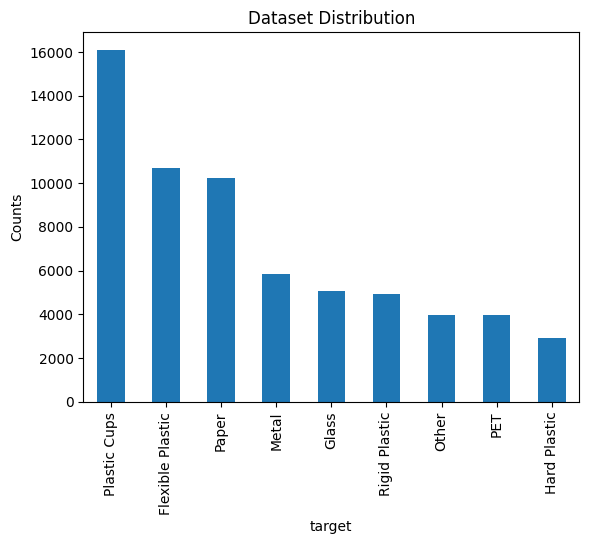

In [6]:
df['target'].value_counts().plot.bar(title = "Dataset Distribution", ylabel="Counts")

In [7]:
df['path'] = df['path'].astype(str)

In [8]:
rus = RandomUnderSampler(random_state=123123)

In [9]:
df['path'].to_numpy()

array(['datasets/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification/brown-glass/brown-glass218.jpg',
       'datasets/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification/brown-glass/brown-glass404.jpg',
       'datasets/datasets/mostafaabla/garbage-classification/versions/1/garbage_classification/brown-glass/brown-glass151.jpg',
       ...,
       'datasets/roboflow/classification-pet-hdpe/valid/HDPE/IMG_0172_JPG_jpg.rf.12fe92b5d7eea671de0cc1d390b138af.jpg',
       'datasets/roboflow/classification-pet-hdpe/valid/HDPE/IMG_1819_JPG_jpg.rf.890003306fac91ba596768c6fb81126f.jpg',
       'datasets/roboflow/classification-pet-hdpe/valid/HDPE/IMG_1940_JPG_jpg.rf.55b8eb3980a2bddbcf3b76ed509163ea.jpg'],
      dtype=object)

In [10]:
X_resampled, y_resampled = rus.fit_resample(df['path'].to_numpy().reshape(-1, 1), df['target'].to_numpy())

In [11]:
df = pd.DataFrame({'path': X_resampled.ravel(), 'target': y_resampled.ravel()})


<Axes: title={'center': 'Dataset Distribution'}, xlabel='target', ylabel='Counts'>

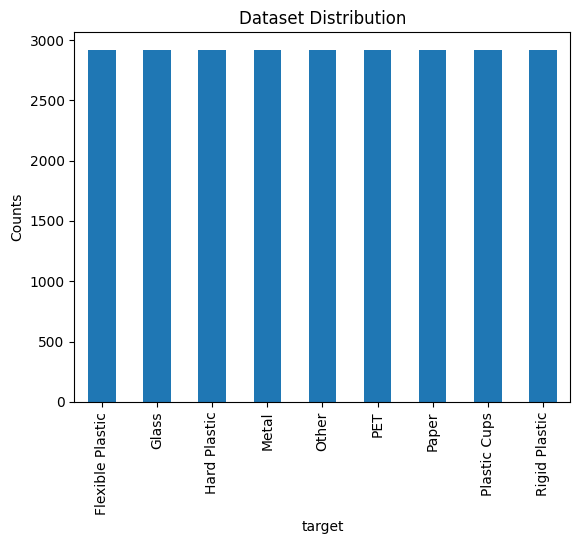

In [12]:
df['target'].value_counts().plot.bar(title = "Dataset Distribution", ylabel="Counts")

In [13]:
df.to_csv("balanced_datasetv2.csv", index=False)